# Agglomerative Clustering

Agglomerative clustering is a collection of clustering algorithms that all build upon the same principles:
1. Start with each point as its own cluster.
2. Find the two closest clusters and merge them.
3. Repeat step 2 until some stopping criterion is satisfied.

The stopping criterion can be a fixed number of clusters, a fixed number of points, or a distance threshold.

The one implemented in scikit-learn is the number of clusters.

## Linkage criteria

The key to agglomerative clustering is the definition of the distance between two clusters. This is done using a linkage criterion. The most common linkage criteria are:

- **Ward**:
    - The default choice.
    - It picks the two clusters to merge such that the variance of the resulting cluster is minimized.
    - This often leads to clusters that are relatively equally sized.
- **Average**:
    - It merges the two clusters that have the smallest average distance between all their points.
- **Complete** (or maximum linkage):
    - It merges the two clusters that have the smallest maximum distance between their points.

Ward works on most datasets.
If the clusters have very different sizes, average or complete linkage might work better.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

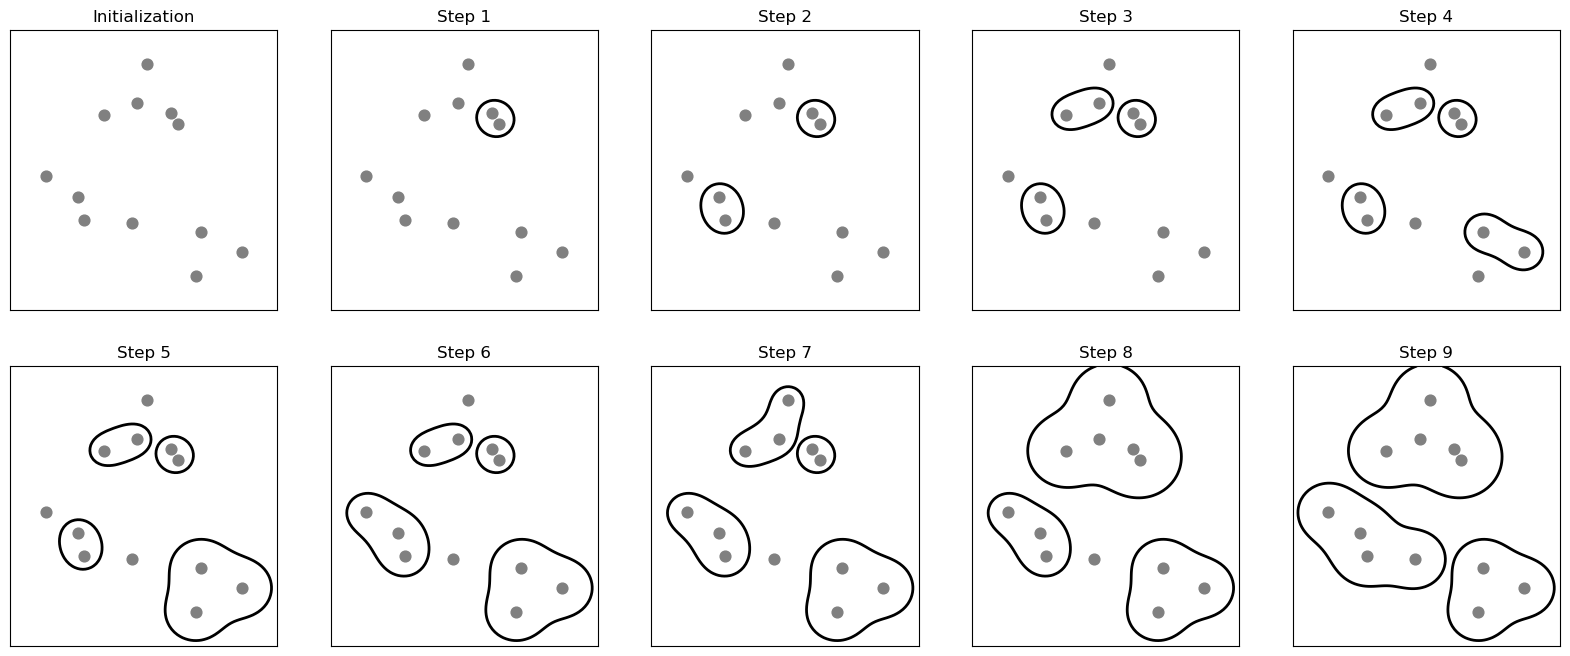

In [2]:
mglearn.plots.plot_agglomerative_algorithm()

- Initially, each point is its own cluster.
- In each step, the two clusters that are closest to each other are merged.
- This is repeated until the desired number of clusters is reached.

Text(0, 0.5, 'Feature 1')

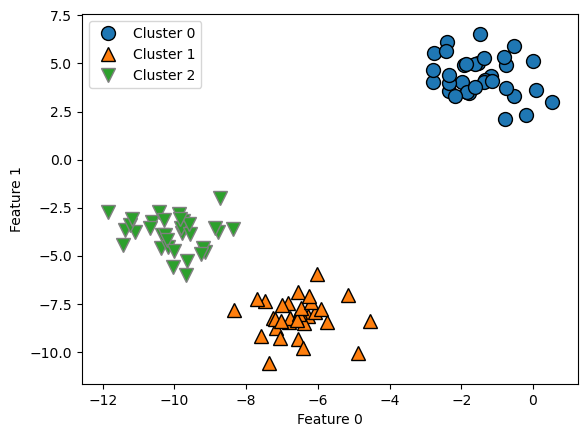

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Hierarchical clustering and dendrogram

**Hierarchical clustering** is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. 


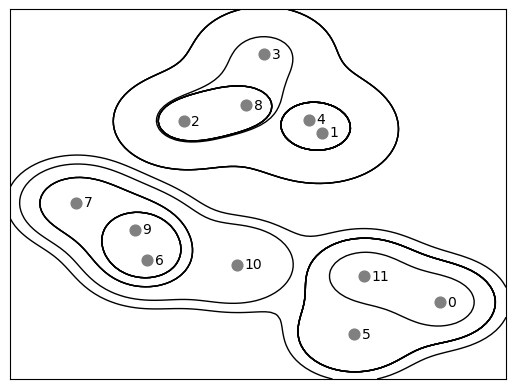

In [6]:
mglearn.plots.plot_agglomerative()

- This representation cannot be used on large dimensions.

The result of hierarchical clustering is a tree-based representation of the objects, which is also known as a **dendrogram**.

**dendogram**:
- A dendrogram is a diagram that shows the arrangement of the clusters produced by hierarchical clustering.
- It shows the order in which the clusters are merged.

Text(0, 0.5, 'Cluster distance')

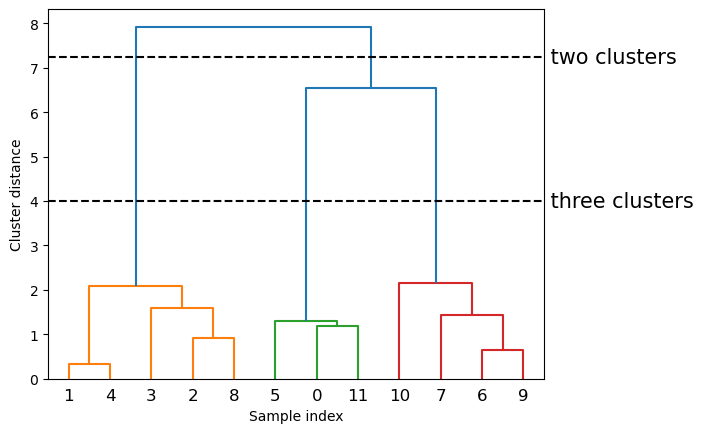

In [7]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

- X-axis: The data points.
- Y-axis: The distance between the clusters.
    - Specify when in the agglomerative algorithm the two clusters get merged.
    - The length of each branch shows how far apart the clusters are.
